In [1]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() 

In [3]:
X_train[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
           0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
           4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,
           0,  12,  10

In [4]:
n_cat = len(np.unique(y_test))

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1) 
y_train = to_categorical(y_train, n_cat) 
y_test = to_categorical(y_test, n_cat) 

In [6]:
model = Sequential([ 
Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), 
MaxPooling2D((2,2)), 
Conv2D(64, (3,3), 
activation='relu'), 
MaxPooling2D((2,2)), 
Flatten(), 
Dense(128, activation='relu'), 
Dense(n_cat, activation='softmax')])

C:\Users\patil\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [8]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.7361 - loss: 3.1244 - val_accuracy: 0.8506 - val_loss: 0.4091
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.8701 - loss: 0.3624 - val_accuracy: 0.8750 - val_loss: 0.3535
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.8866 - loss: 0.3040 - val_accuracy: 0.8743 - val_loss: 0.3396
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.8990 - loss: 0.2689 - val_accuracy: 0.8811 - val_loss: 0.3237
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9052 - loss: 0.2492 - val_accuracy: 0.8837 - val_loss: 0.3291


In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test) 
print(f"Test Accuracy: {test_acc}") 

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8865 - loss: 0.3281
Test Accuracy: 0.8837000131607056


In [10]:
import matplotlib.pyplot as plt

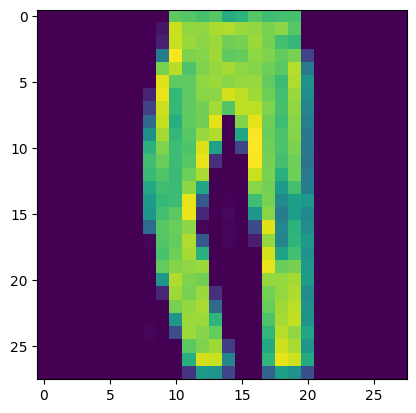

In [11]:
plt.imshow(X_test[5].reshape(28,28))

In [12]:
pred = model.predict(X_test[5].reshape(-1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


In [13]:
ans = np.argmax(pred)
ans

np.int64(1)

In [14]:
org = np.argmax(y_test[5])
org

np.int64(1)